In [24]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# set screen size
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [26]:
# load the file
rawDf=pd.read_csv("C:\\Users\\sahil\\Machine Learning Projects\\House Price Prediction\\PropertyPrice_Data.csv")


In [27]:
# Let us check the dimension of the file 
rawDf.shape # 1459-raws & 26-cloumns

(1459, 26)

In [28]:
print('The number of rows :',rawDf.shape[0])
print('The number of columns :',rawDf.shape[1])

The number of rows : 1459
The number of columns : 26


In [29]:
# Let us see the first five raws of data
rawDf.head().T
# we have both types of columns such as continious & object(Categorical) columns

,0,1,2,3,4
Id,1,2,3,4,5
Road_Type,Paved,Paved,Paved,Paved,Paved
Property_Shape,Reg,Reg,IR1,IR1,IR1
House_Type,1Fam,1Fam,1Fam,1Fam,1Fam
House_Condition,5,8,5,5,5
Construction_Year,2003,1976,2001,1915,2000
Remodel_Year,2003,1976,2002,1970,2000
BsmtFinSF1,706,978,486,216,655
Total_Basement_Area,856,1262,920,756,1145
Air_Conditioning,Y,Y,Y,Y,Y


In [30]:
# Let us see the info of the dataset
rawDf.info()
# We have 20 Columns which are continous & 6 object columns
# We may have missing values in some columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Road_Type                  1459 non-null   object 
 2   Property_Shape             1459 non-null   object 
 3   House_Type                 1459 non-null   object 
 4   House_Condition            1459 non-null   int64  
 5   Construction_Year          1459 non-null   int64  
 6   Remodel_Year               1459 non-null   int64  
 7   BsmtFinSF1                 1459 non-null   int64  
 8   Total_Basement_Area        1459 non-null   int64  
 9   Air_Conditioning           1459 non-null   object 
 10  First_Floor_Area           1459 non-null   int64  
 11  Second_Floor_Area          1459 non-null   int64  
 12  LowQualFinSF               1459 non-null   int64  
 13  Underground_Full_Bathroom  1459 non-null   int64

In [31]:
# Remove 'Id' column
rawDf.drop('Id',axis=1,inplace=True)
rawDf.shape

(1459, 25)

In [32]:
# Statistical Summary
rawDf.describe().T

,count,mean,std,min,25%,50%,75%,max
House_Condition,1459.0,5.575051,1.113125,1.00000,5.000000,5.000000,6.000000,9.000000
Construction_Year,1459.0,1971.272104,30.212814,1872.00000,1954.000000,1973.000000,2000.000000,2010.000000
Remodel_Year,1459.0,1984.879369,20.645927,1950.00000,1967.000000,1994.000000,2004.000000,2010.000000
BsmtFinSF1,1459.0,443.374914,456.142186,0.00000,0.000000,383.000000,712.000000,5644.000000
Total_Basement_Area,1459.0,1057.293352,438.824912,0.00000,795.500000,991.000000,1298.500000,6110.000000
First_Floor_Area,1459.0,1162.562714,386.712553,334.00000,882.000000,1086.000000,1391.500000,4692.000000
Second_Floor_Area,1459.0,347.230295,436.583480,0.00000,0.000000,0.000000,728.000000,2065.000000
LowQualFinSF,1459.0,5.848526,48.639512,0.00000,0.000000,0.000000,0.000000,572.000000
Underground_Full_Bathroom,1459.0,0.424949,0.518870,0.00000,0.000000,0.000000,1.000000,3.000000
Full_Bathroom_Above_Grade,1459.0,1.565456,0.550906,0.00000,1.000000,2.000000,2.000000,3.000000


In [33]:
# univariate Analysis( analysis of single variable)
# missing values imputation
rawDf.isna().sum()
# We have missing values in Garage & Garage_Built_Year

Road_Type                     0
Property_Shape                0
House_Type                    0
House_Condition               0
Construction_Year             0
Remodel_Year                  0
BsmtFinSF1                    0
Total_Basement_Area           0
Air_Conditioning              0
First_Floor_Area              0
Second_Floor_Area             0
LowQualFinSF                  0
Underground_Full_Bathroom     0
Full_Bathroom_Above_Grade     0
Bedroom_Above_Grade           0
Kitchen_Quality               0
Rooms_Above_Grade             0
Fireplaces                    0
Garage                       81
Garage_Built_Year            81
Garage_Area                   0
Pool_Area                     0
Miscellaneous_Value           0
Year_Sold                     0
Sale_Price                    0
dtype: int64

In [34]:
# Garage
rawDf['Garage'].dtypes # object column
tempMode=rawDf['Garage'].mode()[0]
tempMode


'Attchd'

In [35]:
# Missing values imputation for Garage
rawDf['Garage'].fillna(tempMode,inplace=True)

In [36]:
# Garage_Built_Year
rawDf['Garage_Built_Year'].dtypes # Continuous column
tempMedian=rawDf['Garage_Built_Year'].median()
tempMedian

1980.0

In [37]:
# Missing values imputation for Garage_Built_Year
rawDf['Garage_Built_Year'].fillna(tempMedian,inplace=True)

In [38]:
# Let us verify missing value
rawDf.isna().sum() # We do not have missing values now

Road_Type                    0
Property_Shape               0
House_Type                   0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
BsmtFinSF1                   0
Total_Basement_Area          0
Air_Conditioning             0
First_Floor_Area             0
Second_Floor_Area            0
LowQualFinSF                 0
Underground_Full_Bathroom    0
Full_Bathroom_Above_Grade    0
Bedroom_Above_Grade          0
Kitchen_Quality              0
Rooms_Above_Grade            0
Fireplaces                   0
Garage                       0
Garage_Built_Year            0
Garage_Area                  0
Pool_Area                    0
Miscellaneous_Value          0
Year_Sold                    0
Sale_Price                   0
dtype: int64

In [39]:
# Loop(for multiple columns imputation)
# for i in rawDf.columns:
#     if i!='Sale_Price' and rawDf[i].dtypes!='O':  # Capital letter O
#         tempMeadian=rawDf[i].median()
#         rawDf[i].fillna(tempMedian,inplace=True)
#     else:
#         tempMode=rawDf[i].mode()[0]
#         rawDf[i].fillna(tempMode,inplace=True)


['House_Condition', 'Construction_Year', 'Remodel_Year', 'BsmtFinSF1', 'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area', 'LowQualFinSF', 'Underground_Full_Bathroom', 'Full_Bathroom_Above_Grade', 'Bedroom_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces', 'Garage_Built_Year', 'Garage_Area', 'Pool_Area', 'Miscellaneous_Value', 'Year_Sold', 'Sale_Price']


<Axes: >

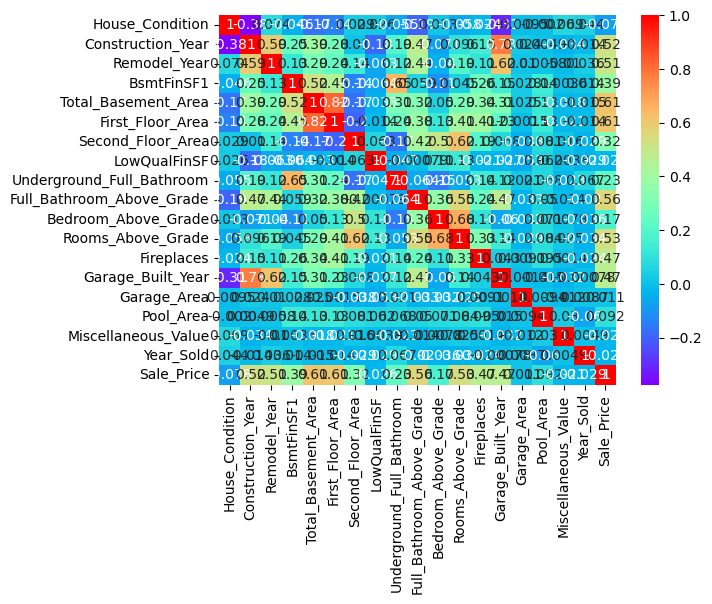

In [40]:
# Bivariate Analysis
# Continuous variable vs dependent variable
contVar=[]
for i in rawDf.columns:
    if rawDf[i].dtypes!='O':  # Capital letter O
        contVar.append(i)
print(contVar)


corrDf=rawDf[contVar].corr()
sns.heatmap(corrDf,annot=True,cmap='rainbow')

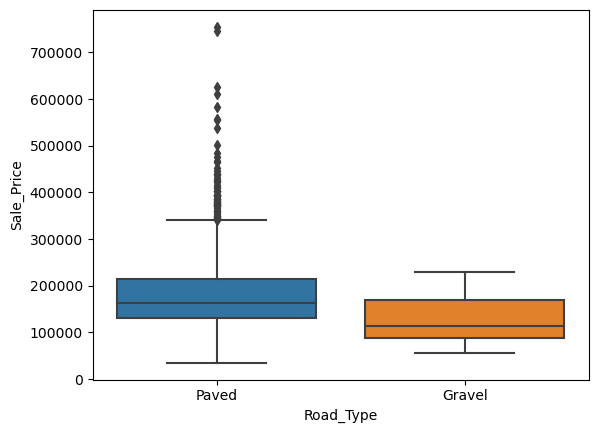

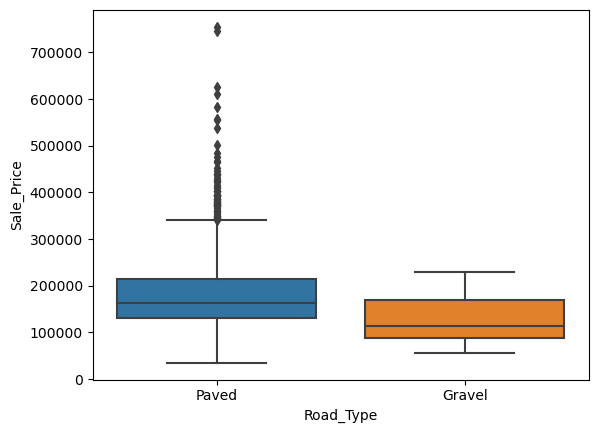

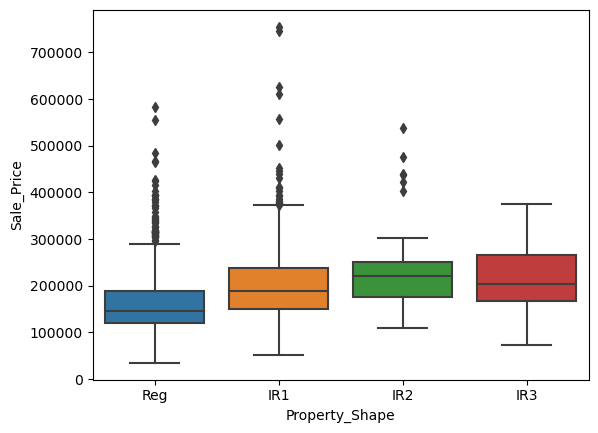

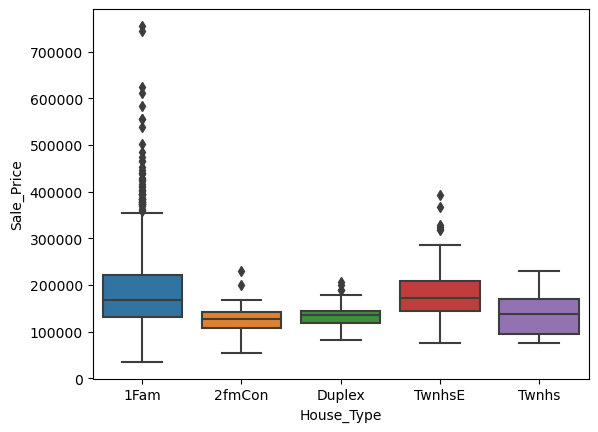

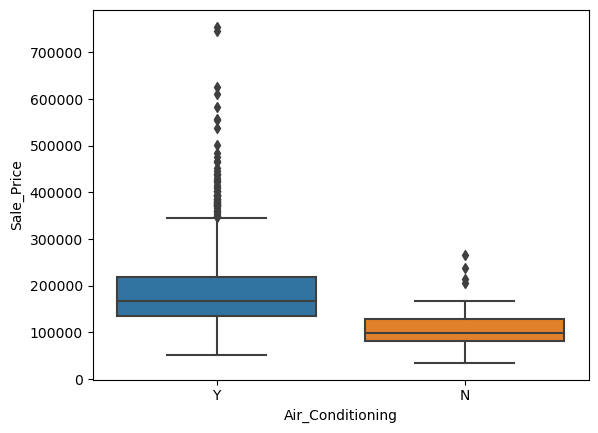

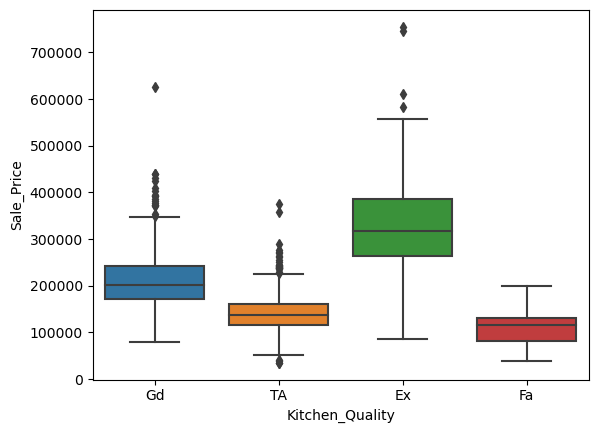

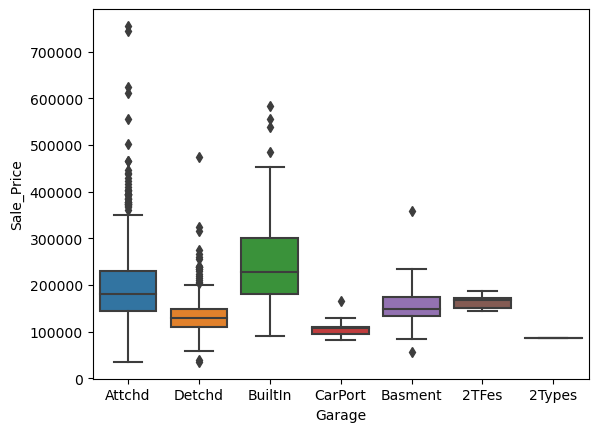

In [41]:
# dependent variable vs independent variable
sns.boxplot(y=rawDf['Sale_Price'],x=rawDf['Road_Type'])
from matplotlib.pyplot import figure
catVar=[]
for i in rawDf.columns:
    if rawDf[i].dtypes=='O':
        catVar.append(i)
catVar

for i in catVar:
    figure()
    sns.boxplot(y=rawDf['Sale_Price'],x=rawDf[i])

In [42]:
# Let us convert dummy variables  # use for converting categorical values to continuous
fullDf=pd.get_dummies(rawDf,drop_first=True)
fullDf.shape

(1459, 37)

In [43]:
# Let us add intercept column
from statsmodels.api import add_constant
fullDf=add_constant(fullDf)
fullDf.shape

(1459, 38)

In [44]:
# Divide the data into train & test
from sklearn.model_selection import train_test_split
trainDf,testDf=train_test_split(fullDf,train_size=0.8,random_state=2410)

print('train shape',trainDf.shape)
print('test shape',testDf.shape)

# Let us divide train & test into dep vs indep var
trainX=trainDf.drop('Sale_Price',axis=1)
trainY=trainDf['Sale_Price']

testX=testDf.drop('Sale_Price',axis=1)
testY=testDf['Sale_Price']

train shape (1167, 38)
test shape (292, 38)


In [45]:
print('TrainX shape',trainX.shape)
print('TrainY shape',trainY.shape)

TrainX shape (1167, 37)
TrainY shape (1167,)


In [46]:
print('TestX shape',testX.shape)
print('TestY shape',testY.shape)

TestX shape (292, 37)
TestY shape (292,)


In [47]:
# Variance Inflation Factor (VIF)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
tempMaxVIF=5 # The VIF that will be calculated at every iteration in while loop
maxVIFCutoff=5 # 5 is recommended cut off value for linear regression 
trainXcopy=trainX.copy()
highVIFColumnNames=[]

while(tempMaxVIF>=maxVIFCutoff):
    
    # create an empty temporary df to store VIF values
    tempVIFDf=pd.DataFrame()
    # calculate VIF using list comprehension
    tempVIFDf['VIF']=[variance_inflation_factor(trainXcopy.values,i) for i in range(trainXcopy.shape[1])]
    # Create a new column 'Column_Name' to store the columns name against the VIF values from list comprehension
    tempVIFDf['Column_Name']=trainXcopy.columns
    # drop NA rows if there is any miscalculation
    tempVIFDf.dropna(inplace=True)
    # sort the df based on VIF values then pick the top most column name(which has the highest VIF)
    tempColumnsName=tempVIFDf.sort_values(['VIF'],ascending=False).iloc[0,1]
    # tempColumnsName=tempVIFDf.sort_values(['VIF'],ascending=True)[-1:]['Coumn_Name'].values[0]
    
    
    # store the max VIF value in tempMaxVIF
    tempMaxVIF=tempVIFDf.sort_values(['VIF'],ascending=False).iloc[0,0]
    
    # tempMaxVIF=tempVIFDf.sort_values(['VIF'])[-1:]['VIF'].values[0]
    
    if (tempMaxVIF>maxVIFCutoff):
        trainXcopy=trainXcopy.drop(tempColumnsName,axis=1)
        highVIFColumnNames.append(tempColumnsName)
highVIFColumnNames  

highVIFColumnNames.remove('const')

highVIFColumnNames

['Year_Sold',
 'Garage_Built_Year',
 'Remodel_Year',
 'Construction_Year',
 'Road_Type_Paved',
 'Rooms_Above_Grade',
 'Garage_Attchd',
 'First_Floor_Area',
 'Bedroom_Above_Grade',
 'House_Condition',
 'Air_Conditioning_Y',
 'Full_Bathroom_Above_Grade',
 'Total_Basement_Area']

In [49]:
# remove highVIfColumn fro our actuall data frame 
trainX=trainX.drop(highVIFColumnNames,axis=1)
testX=testX.drop(highVIFColumnNames,axis=1)

trainX.shape
testX.shape

(292, 24)

In [50]:
# Model Building

In [51]:
# Linear Regression from OLS
from statsmodels.api import OLS  # OLS - ordinary least squared
# this is model definition
LM=OLS(trainY,trainX) # dep,independent variable

Model=LM.fit() # using fit() method data is fit into the model

Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     96.05
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          9.54e-248
Time:                        13:42:04   Log-Likelihood:                -14217.
No. Observations:                1167   AIC:                         2.848e+04
Df Residuals:                    1143   BIC:                         2.860e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.619e+05   7974.280     32.840      0.000    2.46e+05    2.78e+05
BsmtFinSF1                   40.2452      4.397      9.152      0.000      31.617      48.873
Second_Floor_Area            38.1924      3.685     10.364      0.000      30.962      45.423
LowQualFinSF                -34.2304     31.720     -1.079      0.281     -96.465      28.005
Underground_Full_Bathroom -1641.2935   3670.559     -0.447      0.655   -8843.083    5560.496
Fireplaces                 2.334e+04   2446.154      9.542      0.000    1.85e+04    2.81e+04
Garage_Area                  -2.1214      6.685     -0.317      0.751     -15.238      10.995
Pool_Area                   -13.2415     32.057     -0.413      0.680     -76.139      49.656
Miscellaneous_Value          -1.2067      2.563     -0.471      0.638      -6.236       3.822
Property_Shape_IR2         2.409e+04   8965.949      2.687      0.007    6500.523    4.17e+04
Property_Shape_IR3         -3.95e+04   1.65e+04     -2.395      0.017   -7.19e+04   -7142.546
Property_Shape_Reg        -9018.5873   3155.876     -2.858      0.004   -1.52e+04   -2826.627
House_Type_2fmCon         -2.262e+04   9732.301     -2.324      0.020   -4.17e+04   -3521.813
House_Type_Duplex          5141.7573   7963.944      0.646      0.519   -1.05e+04    2.08e+04
House_Type_Twnhs          -3.255e+04   8188.650     -3.975      0.000   -4.86e+04   -1.65e+04
House_Type_TwnhsE         -1.229e+04   5250.638     -2.341      0.019   -2.26e+04   -1987.348
Kitchen_Quality_Fa        -1.602e+05   1.05e+04    -15.232      0.000   -1.81e+05    -1.4e+05
Kitchen_Quality_Gd        -8.983e+04   5977.093    -15.029      0.000   -1.02e+05   -7.81e+04
Kitchen_Quality_TA         -1.41e+05   6098.644    -23.123      0.000   -1.53e+05   -1.29e+05
Garage_2Types             -4.783e+04   4.81e+04     -0.995      0.320   -1.42e+05    4.65e+04
Garage_Basment              641.3935   1.22e+04      0.053      0.958   -2.33e+04    2.46e+04
Garage_BuiltIn             1.468e+04   6453.552      2.275      0.023    2018.397    2.73e+04
Garage_CarPort            -4.049e+04   1.84e+04     -2.201      0.028   -7.66e+04   -4392.815
Garage_Detchd              -2.05e+04   3523.722     -5.819      0.000   -2.74e+04   -1.36e+04
==============================================================================
Omnibus:                      289.830   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4362.412
Skew:                           0.716   Prob(JB):                         0.00
Kurtosis:                      12.363   Cond. No.                     2.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the er

In [52]:
## p values
Model.pvalues

const                        3.963524e-167
BsmtFinSF1                    2.497249e-19
Second_Floor_Area             4.077387e-24
LowQualFinSF                  2.807453e-01
Underground_Full_Bathroom     6.548509e-01
Fireplaces                    8.144574e-21
Garage_Area                   7.510575e-01
Pool_Area                     6.796391e-01
Miscellaneous_Value           6.378787e-01
Property_Shape_IR2            7.312888e-03
Property_Shape_IR3            1.677578e-02
Property_Shape_Reg            4.344450e-03
House_Type_2fmCon             2.030495e-02
House_Type_Duplex             5.186489e-01
House_Type_Twnhs              7.482924e-05
House_Type_TwnhsE             1.942723e-02
Kitchen_Quality_Fa            7.734576e-48
Kitchen_Quality_Gd            1.009822e-46
Kitchen_Quality_TA            2.377673e-97
Garage_2Types                 3.197791e-01
Garage_Basment                9.581040e-01
Garage_BuiltIn                2.310258e-02
Garage_CarPort                2.795067e-02
Garage_Detc

In [53]:
# select significant variables
colToDrop=['Garage_Basment']
M2=OLS(trainY,trainX.drop(colToDrop,axis=1)).fit()
M2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          9.42e-249
Time:                        13:42:07   Log-Likelihood:                -14217.
No. Observations:                1167   AIC:                         2.848e+04
Df Residuals:                    1144   BIC:                         2.860e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.619e+05   7969.429     32.859      0.000    2.46e+05    2.78e+05
BsmtFinSF1                   40.2402      4.394      9.157      0.000      31.618      48.862
Second_Floor_Area            38.1904      3.683     10.368      0.000      30.963      45.417
LowQualFinSF                -34.1450     31.664     -1.078      0.281     -96.271      27.981
Underground_Full_Bathroom -1640.8674   3668.950     -0.447      0.655   -8839.493    5557.758
Fireplaces                 2.335e+04   2441.040      9.565      0.000    1.86e+04    2.81e+04
Garage_Area                  -2.1137      6.681     -0.316      0.752     -15.222      10.994
Pool_Area                   -13.2552     32.042     -0.414      0.679     -76.123      49.612
Miscellaneous_Value          -1.2076      2.562     -0.471      0.637      -6.234       3.819
Property_Shape_IR2         2.409e+04   8961.270      2.688      0.007    6503.544    4.17e+04
Property_Shape_IR3        -3.951e+04   1.65e+04     -2.397      0.017   -7.19e+04   -7164.106
Property_Shape_Reg        -9016.5043   3154.251     -2.859      0.004   -1.52e+04   -2827.737
House_Type_2fmCon         -2.263e+04   9724.431     -2.327      0.020   -4.17e+04   -3551.233
House_Type_Duplex          5130.9848   7957.834      0.645      0.519   -1.05e+04    2.07e+04
House_Type_Twnhs          -3.255e+04   8185.081     -3.977      0.000   -4.86e+04   -1.65e+04
House_Type_TwnhsE         -1.228e+04   5242.333     -2.342      0.019   -2.26e+04   -1990.447
Kitchen_Quality_Fa        -1.601e+05   1.05e+04    -15.295      0.000   -1.81e+05    -1.4e+05
Kitchen_Quality_Gd        -8.982e+04   5973.066    -15.038      0.000   -1.02e+05   -7.81e+04
Kitchen_Quality_TA         -1.41e+05   6083.916    -23.175      0.000   -1.53e+05   -1.29e+05
Garage_2Types             -4.785e+04    4.8e+04     -0.996      0.319   -1.42e+05    4.64e+04
Garage_BuiltIn             1.467e+04   6448.960      2.275      0.023    2019.456    2.73e+04
Garage_CarPort            -4.051e+04   1.84e+04     -2.203      0.028   -7.66e+04   -4422.797
Garage_Detchd             -2.052e+04   3508.107     -5.850      0.000   -2.74e+04   -1.36e+04
==============================================================================
Omnibus:                      289.876   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4362.264
Skew:                           0.716   Prob(JB):                         0.00
Kurtosis:                      12.363   Cond. No.                     2.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+04. This might indicate 

In [54]:
colToDrop=['Garage_Basment','Garage_Area']
M3=OLS(trainY,trainX.drop(colToDrop,axis=1)).fit()
M3.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          9.52e-250
Time:                        13:42:08   Log-Likelihood:                -14217.
No. Observations:                1167   AIC:                         2.848e+04
Df Residuals:                    1145   BIC:                         2.859e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.607e+05   7079.223     36.828      0.000    2.47e+05    2.75e+05
BsmtFinSF1                   40.2632      4.392      9.167      0.000      31.646      48.881
Second_Floor_Area            38.2576      3.676     10.408      0.000      31.045      45.470
LowQualFinSF                -33.4727     31.580     -1.060      0.289     -95.434      28.489
Underground_Full_Bathroom -1641.9637   3667.506     -0.448      0.654   -8837.750    5553.822
Fireplaces                 2.334e+04   2440.032      9.567      0.000    1.86e+04    2.81e+04
Pool_Area                   -13.4829     32.021     -0.421      0.674     -76.310      49.344
Miscellaneous_Value          -1.1954      2.561     -0.467      0.641      -6.219       3.829
Property_Shape_IR2         2.398e+04   8951.281      2.679      0.007    6415.444    4.15e+04
Property_Shape_IR3        -3.953e+04   1.65e+04     -2.399      0.017   -7.19e+04   -7193.911
Property_Shape_Reg        -9020.4048   3152.988     -2.861      0.004   -1.52e+04   -2834.123
House_Type_2fmCon         -2.265e+04   9720.357     -2.330      0.020   -4.17e+04   -3581.407
House_Type_Duplex          5057.4819   7951.316      0.636      0.525   -1.05e+04    2.07e+04
House_Type_Twnhs          -3.244e+04   8175.213     -3.969      0.000   -4.85e+04   -1.64e+04
House_Type_TwnhsE         -1.227e+04   5240.213     -2.341      0.019   -2.25e+04   -1986.700
Kitchen_Quality_Fa        -1.598e+05   1.04e+04    -15.331      0.000    -1.8e+05   -1.39e+05
Kitchen_Quality_Gd        -8.965e+04   5945.238    -15.079      0.000   -1.01e+05    -7.8e+04
Kitchen_Quality_TA        -1.409e+05   6068.357    -23.214      0.000   -1.53e+05   -1.29e+05
Garage_2Types             -4.816e+04    4.8e+04     -1.003      0.316   -1.42e+05     4.6e+04
Garage_BuiltIn             1.458e+04   6439.426      2.264      0.024    1943.122    2.72e+04
Garage_CarPort            -4.047e+04   1.84e+04     -2.202      0.028   -7.65e+04   -4405.653
Garage_Detchd             -2.055e+04   3505.589     -5.862      0.000   -2.74e+04   -1.37e+04
==============================================================================
Omnibus:                      289.351   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4364.070
Skew:                           0.714   Prob(JB):                         0.00
Kurtosis:                      12.366   Cond. No.                     2.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
colToDrop=['Garage_Basment','Garage_Area','Pool_Area']
M4=OLS(trainY,trainX.drop(colToDrop,axis=1)).fit()
M4.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     110.7
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          9.75e-251
Time:                        13:42:08   Log-Likelihood:                -14217.
No. Observations:                1167   AIC:                         2.848e+04
Df Residuals:                    1146   BIC:                         2.858e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.608e+05   7072.924     36.874      0.000    2.47e+05    2.75e+05
BsmtFinSF1                   40.0527      4.362      9.182      0.000      31.494      48.611
Second_Floor_Area            38.1027      3.656     10.422      0.000      30.929      45.276
LowQualFinSF                -34.5931     31.457     -1.100      0.272     -96.312      27.126
Underground_Full_Bathroom -1615.2291   3665.640     -0.441      0.660   -8807.347    5576.889
Fireplaces                  2.33e+04   2437.357      9.561      0.000    1.85e+04    2.81e+04
Miscellaneous_Value          -1.2282      2.558     -0.480      0.631      -6.248       3.792
Property_Shape_IR2         2.403e+04   8947.128      2.686      0.007    6478.199    4.16e+04
Property_Shape_IR3        -4.006e+04   1.64e+04     -2.439      0.015   -7.23e+04   -7834.613
Property_Shape_Reg        -9032.2774   3151.730     -2.866      0.004   -1.52e+04   -2848.470
House_Type_2fmCon          -2.26e+04   9715.973     -2.326      0.020   -4.17e+04   -3534.507
House_Type_Duplex          5042.5579   7948.382      0.634      0.526   -1.06e+04    2.06e+04
House_Type_Twnhs          -3.241e+04   8171.840     -3.966      0.000   -4.84e+04   -1.64e+04
House_Type_TwnhsE         -1.223e+04   5237.676     -2.336      0.020   -2.25e+04   -1956.777
Kitchen_Quality_Fa        -1.598e+05   1.04e+04    -15.336      0.000    -1.8e+05   -1.39e+05
Kitchen_Quality_Gd        -8.964e+04   5943.082    -15.083      0.000   -1.01e+05    -7.8e+04
Kitchen_Quality_TA        -1.408e+05   6065.112    -23.218      0.000   -1.53e+05   -1.29e+05
Garage_2Types             -4.821e+04    4.8e+04     -1.005      0.315   -1.42e+05    4.59e+04
Garage_BuiltIn             1.473e+04   6426.570      2.292      0.022    2123.485    2.73e+04
Garage_CarPort            -4.047e+04   1.84e+04     -2.203      0.028   -7.65e+04   -4419.298
Garage_Detchd             -2.057e+04   3504.022     -5.870      0.000   -2.74e+04   -1.37e+04
==============================================================================
Omnibus:                      285.929   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4449.931
Skew:                           0.689   Prob(JB):                         0.00
Kurtosis:                      12.467   Cond. No.                     2.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
colToDrop=['Garage_Basment','Garage_Area','Pool_Area','Underground_Full_Bathroom']
M5=OLS(trainY,trainX.drop(colToDrop,axis=1)).fit()
M5.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     116.6
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          9.81e-252
Time:                        13:42:09   Log-Likelihood:                -14217.
No. Observations:                1167   AIC:                         2.847e+04
Df Residuals:                    1147   BIC:                         2.858e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.607e+05   7064.950     36.898      0.000    2.47e+05    2.75e+05
BsmtFinSF1             38.8509      3.403     11.417      0.000      32.174      45.527
Second_Floor_Area      38.2699      3.635     10.528      0.000      31.138      45.402
LowQualFinSF          -34.9648     31.434     -1.112      0.266     -96.640      26.710
Fireplaces           2.333e+04   2435.920      9.577      0.000    1.85e+04    2.81e+04
Miscellaneous_Value    -1.1785      2.555     -0.461      0.645      -6.192       3.835
Property_Shape_IR2   2.418e+04   8937.505      2.706      0.007    6647.142    4.17e+04
Property_Shape_IR3  -3.952e+04   1.64e+04     -2.414      0.016   -7.16e+04   -7396.562
Property_Shape_Reg  -9017.7118   3150.449     -2.862      0.004   -1.52e+04   -2836.423
House_Type_2fmCon   -2.286e+04   9694.037     -2.358      0.019   -4.19e+04   -3841.844
House_Type_Duplex    4835.4587   7931.687      0.610      0.542   -1.07e+04    2.04e+04
House_Type_Twnhs    -3.245e+04   8168.314     -3.973      0.000   -4.85e+04   -1.64e+04
House_Type_TwnhsE    -1.23e+04   5233.634     -2.350      0.019   -2.26e+04   -2031.638
Kitchen_Quality_Fa  -1.599e+05   1.04e+04    -15.346      0.000    -1.8e+05   -1.39e+05
Kitchen_Quality_Gd  -8.982e+04   5926.968    -15.155      0.000   -1.01e+05   -7.82e+04
Kitchen_Quality_TA  -1.409e+05   6061.921    -23.239      0.000   -1.53e+05   -1.29e+05
Garage_2Types       -4.978e+04   4.78e+04     -1.041      0.298   -1.44e+05    4.41e+04
Garage_BuiltIn       1.467e+04   6422.504      2.283      0.023    2064.286    2.73e+04
Garage_CarPort      -4.091e+04   1.83e+04     -2.230      0.026   -7.69e+04   -4918.594
Garage_Detchd       -2.056e+04   3502.775     -5.871      0.000   -2.74e+04   -1.37e+04
==============================================================================
Omnibus:                      287.928   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4404.137
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                      12.413   Cond. No.                     2.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
colToDrop=['Garage_Basment','Garage_Area','Pool_Area','Underground_Full_Bathroom','Miscellaneous_Value']
M6=OLS(trainY,trainX.drop(colToDrop,axis=1)).fit()
M6.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     123.1
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          9.68e-253
Time:                        13:42:09   Log-Likelihood:                -14217.
No. Observations:                1167   AIC:                         2.847e+04
Df Residuals:                    1148   BIC:                         2.857e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.607e+05   7062.488     36.913      0.000    2.47e+05    2.75e+05
BsmtFinSF1            38.8227      3.401     11.414      0.000      32.150      45.496
Second_Floor_Area     38.2389      3.633     10.525      0.000      31.111      45.367
LowQualFinSF         -34.9571     31.424     -1.112      0.266     -96.611      26.697
Fireplaces          2.333e+04   2435.083      9.579      0.000    1.85e+04    2.81e+04
Property_Shape_IR2  2.428e+04   8932.028      2.718      0.007    6753.690    4.18e+04
Property_Shape_IR3 -3.936e+04   1.64e+04     -2.405      0.016   -7.15e+04   -7256.336
Property_Shape_Reg -8945.8946   3145.520     -2.844      0.005   -1.51e+04   -2774.283
House_Type_2fmCon  -2.297e+04   9687.770     -2.371      0.018    -4.2e+04   -3964.317
House_Type_Duplex   4651.4226   7918.927      0.587      0.557   -1.09e+04    2.02e+04
House_Type_Twnhs   -3.243e+04   8165.343     -3.972      0.000   -4.85e+04   -1.64e+04
House_Type_TwnhsE  -1.228e+04   5231.668     -2.347      0.019   -2.25e+04   -2015.979
Kitchen_Quality_Fa -1.601e+05   1.04e+04    -15.385      0.000    -1.8e+05    -1.4e+05
Kitchen_Quality_Gd -8.987e+04   5923.999    -15.171      0.000   -1.01e+05   -7.82e+04
Kitchen_Quality_TA  -1.41e+05   6053.749    -23.291      0.000   -1.53e+05   -1.29e+05
Garage_2Types      -4.972e+04   4.78e+04     -1.040      0.299   -1.44e+05    4.41e+04
Garage_BuiltIn      1.456e+04   6415.845      2.269      0.023    1967.022    2.71e+04
Garage_CarPort      -4.11e+04   1.83e+04     -2.242      0.025   -7.71e+04   -5125.886
Garage_Detchd      -2.053e+04   3500.821     -5.865      0.000   -2.74e+04   -1.37e+04
==============================================================================
Omnibus:                      288.194   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4406.775
Skew:                           0.704   Prob(JB):                         0.00
Kurtosis:                      12.415   Cond. No.                     2.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
colToDrop=['Garage_Basment','Garage_Area','Pool_Area','Underground_Full_Bathroom','Miscellaneous_Value','House_Type_Duplex']
M7=OLS(trainY,trainX.drop(colToDrop,axis=1)).fit()
M7.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     130.4
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          9.90e-254
Time:                        13:42:10   Log-Likelihood:                -14218.
No. Observations:                1167   AIC:                         2.847e+04
Df Residuals:                    1149   BIC:                         2.856e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.608e+05   7057.858     36.953      0.000    2.47e+05    2.75e+05
BsmtFinSF1            38.8862      3.398     11.442      0.000      32.218      45.554
Second_Floor_Area     38.2421      3.632     10.529      0.000      31.116      45.368
LowQualFinSF         -35.6341     31.393     -1.135      0.257     -97.229      25.961
Fireplaces          2.316e+04   2418.603      9.577      0.000    1.84e+04    2.79e+04
Property_Shape_IR2  2.428e+04   8929.481      2.719      0.007    6758.055    4.18e+04
Property_Shape_IR3 -3.949e+04   1.64e+04     -2.414      0.016   -7.16e+04   -7394.754
Property_Shape_Reg -8894.8510   3143.423     -2.830      0.005   -1.51e+04   -2727.359
House_Type_2fmCon  -2.333e+04   9665.582     -2.414      0.016   -4.23e+04   -4368.111
House_Type_Twnhs   -3.267e+04   8153.173     -4.006      0.000   -4.87e+04   -1.67e+04
House_Type_TwnhsE  -1.242e+04   5224.862     -2.377      0.018   -2.27e+04   -2167.836
Kitchen_Quality_Fa -1.598e+05   1.04e+04    -15.378      0.000    -1.8e+05   -1.39e+05
Kitchen_Quality_Gd -8.989e+04   5922.179    -15.179      0.000   -1.02e+05   -7.83e+04
Kitchen_Quality_TA -1.408e+05   6038.672    -23.310      0.000   -1.53e+05   -1.29e+05
Garage_2Types      -5.012e+04   4.78e+04     -1.049      0.295   -1.44e+05    4.37e+04
Garage_BuiltIn      1.459e+04   6413.734      2.275      0.023    2006.529    2.72e+04
Garage_CarPort     -4.005e+04   1.82e+04     -2.196      0.028   -7.58e+04   -4262.943
Garage_Detchd      -2.056e+04   3499.533     -5.874      0.000   -2.74e+04   -1.37e+04
==============================================================================
Omnibus:                      288.164   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4397.963
Skew:                           0.705   Prob(JB):                         0.00
Kurtosis:                      12.405   Cond. No.                     2.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
colToDrop=['Garage_Basment','Garage_Area','Pool_Area','Underground_Full_Bathroom','Miscellaneous_Value','House_Type_Duplex',
           'LowQualFinSF']
M8=OLS(trainY,trainX.drop(colToDrop,axis=1)).fit()
M8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     138.5
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          1.57e-254
Time:                        13:42:10   Log-Likelihood:                -14218.
No. Observations:                1167   AIC:                         2.847e+04
Df Residuals:                    1150   BIC:                         2.856e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.605e+05   7052.514     36.933      0.000    2.47e+05    2.74e+05
BsmtFinSF1            39.0618      3.395     11.504      0.000      32.400      45.724
Second_Floor_Area     38.0416      3.628     10.485      0.000      30.923      45.160
Fireplaces          2.318e+04   2418.853      9.584      0.000    1.84e+04    2.79e+04
Property_Shape_IR2  2.437e+04   8930.241      2.729      0.006    6847.535    4.19e+04
Property_Shape_IR3 -3.952e+04   1.64e+04     -2.416      0.016   -7.16e+04   -7419.712
Property_Shape_Reg -8920.5404   3143.735     -2.838      0.005   -1.51e+04   -2752.441
House_Type_2fmCon  -2.297e+04   9661.551     -2.378      0.018   -4.19e+04   -4014.770
House_Type_Twnhs   -3.248e+04   8152.518     -3.984      0.000   -4.85e+04   -1.65e+04
House_Type_TwnhsE  -1.236e+04   5225.265     -2.366      0.018   -2.26e+04   -2108.774
Kitchen_Quality_Fa   -1.6e+05   1.04e+04    -15.391      0.000    -1.8e+05    -1.4e+05
Kitchen_Quality_Gd -8.961e+04   5917.712    -15.143      0.000   -1.01e+05    -7.8e+04
Kitchen_Quality_TA -1.407e+05   6038.957    -23.295      0.000   -1.53e+05   -1.29e+05
Garage_2Types      -4.971e+04   4.78e+04     -1.040      0.299   -1.43e+05    4.41e+04
Garage_BuiltIn      1.487e+04   6409.812      2.320      0.021    2293.672    2.74e+04
Garage_CarPort     -3.988e+04   1.82e+04     -2.186      0.029   -7.57e+04   -4088.875
Garage_Detchd      -2.072e+04   3497.080     -5.925      0.000   -2.76e+04   -1.39e+04
==============================================================================
Omnibus:                      287.760   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4416.751
Skew:                           0.701   Prob(JB):                         0.00
Kurtosis:                      12.427   Cond. No.                     2.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
colToDrop=['Garage_Basment','Garage_Area','Pool_Area','Underground_Full_Bathroom','Miscellaneous_Value','House_Type_Duplex',
           'LowQualFinSF','Garage_2Types']
M9=OLS(trainY,trainX.drop(colToDrop,axis=1)).fit()
M9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          2.17e-255
Time:                        13:42:11   Log-Likelihood:                -14219.
No. Observations:                1167   AIC:                         2.847e+04
Df Residuals:                    1151   BIC:                         2.855e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.604e+05   7052.247     36.922      0.000    2.47e+05    2.74e+05
BsmtFinSF1            39.1304      3.395     11.526      0.000      32.470      45.791
Second_Floor_Area     37.9107      3.626     10.455      0.000      30.796      45.025
Fireplaces          2.325e+04   2417.939      9.617      0.000    1.85e+04     2.8e+04
Property_Shape_IR2  2.439e+04   8930.532      2.731      0.006    6868.664    4.19e+04
Property_Shape_IR3  -3.96e+04   1.64e+04     -2.420      0.016   -7.17e+04   -7497.162
Property_Shape_Reg -8979.9660   3143.327     -2.857      0.004   -1.51e+04   -2812.674
House_Type_2fmCon  -2.287e+04   9661.449     -2.368      0.018   -4.18e+04   -3918.736
House_Type_Twnhs    -3.24e+04   8152.490     -3.975      0.000   -4.84e+04   -1.64e+04
House_Type_TwnhsE  -1.233e+04   5225.359     -2.359      0.018   -2.26e+04   -2076.668
Kitchen_Quality_Fa -1.599e+05   1.04e+04    -15.385      0.000    -1.8e+05    -1.4e+05
Kitchen_Quality_Gd -8.956e+04   5917.684    -15.134      0.000   -1.01e+05   -7.79e+04
Kitchen_Quality_TA -1.407e+05   6038.996    -23.302      0.000   -1.53e+05   -1.29e+05
Garage_BuiltIn        1.5e+04   6408.747      2.341      0.019    2429.548    2.76e+04
Garage_CarPort     -3.975e+04   1.82e+04     -2.179      0.030   -7.55e+04   -3959.464
Garage_Detchd      -2.057e+04   3494.321     -5.887      0.000   -2.74e+04   -1.37e+04
==============================================================================
Omnibus:                      287.157   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4407.499
Skew:                           0.699   Prob(JB):                         0.00
Kurtosis:                      12.418   Cond. No.                     9.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# Final Model Developement
FM=OLS(trainY,trainX.drop(colToDrop,axis=1)).fit()
FM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          2.17e-255
Time:                        13:42:12   Log-Likelihood:                -14219.
No. Observations:                1167   AIC:                         2.847e+04
Df Residuals:                    1151   BIC:                         2.855e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.604e+05   7052.247     36.922      0.000    2.47e+05    2.74e+05
BsmtFinSF1            39.1304      3.395     11.526      0.000      32.470      45.791
Second_Floor_Area     37.9107      3.626     10.455      0.000      30.796      45.025
Fireplaces          2.325e+04   2417.939      9.617      0.000    1.85e+04     2.8e+04
Property_Shape_IR2  2.439e+04   8930.532      2.731      0.006    6868.664    4.19e+04
Property_Shape_IR3  -3.96e+04   1.64e+04     -2.420      0.016   -7.17e+04   -7497.162
Property_Shape_Reg -8979.9660   3143.327     -2.857      0.004   -1.51e+04   -2812.674
House_Type_2fmCon  -2.287e+04   9661.449     -2.368      0.018   -4.18e+04   -3918.736
House_Type_Twnhs    -3.24e+04   8152.490     -3.975      0.000   -4.84e+04   -1.64e+04
House_Type_TwnhsE  -1.233e+04   5225.359     -2.359      0.018   -2.26e+04   -2076.668
Kitchen_Quality_Fa -1.599e+05   1.04e+04    -15.385      0.000    -1.8e+05    -1.4e+05
Kitchen_Quality_Gd -8.956e+04   5917.684    -15.134      0.000   -1.01e+05   -7.79e+04
Kitchen_Quality_TA -1.407e+05   6038.996    -23.302      0.000   -1.53e+05   -1.29e+05
Garage_BuiltIn        1.5e+04   6408.747      2.341      0.019    2429.548    2.76e+04
Garage_CarPort     -3.975e+04   1.82e+04     -2.179      0.030   -7.55e+04   -3959.464
Garage_Detchd      -2.057e+04   3494.321     -5.887      0.000   -2.74e+04   -1.37e+04
==============================================================================
Omnibus:                      287.157   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4407.499
Skew:                           0.699   Prob(JB):                         0.00
Kurtosis:                      12.418   Cond. No.                     9.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# Model Prediction
test_predict=FM.predict(testX.drop(colToDrop,axis=1))
test_predict[0:5]
testY[0:5]

1097    170000
231     403000
1119    133700
415     181134
984     126000
Name: Sale_Price, dtype: int64

<Axes: >

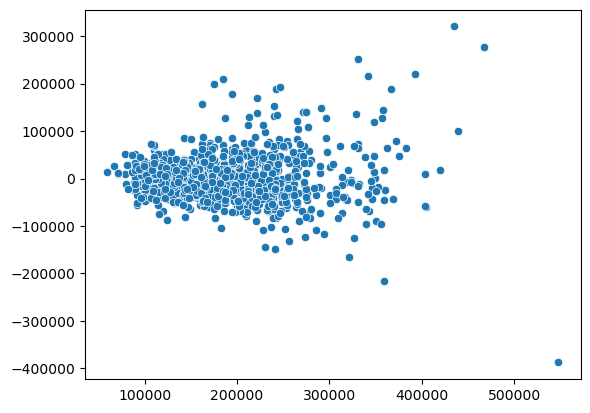

In [63]:
# Model Diagnostics
# Assumption check
# Homoskedascity-scatterplot
sns.scatterplot(x=FM.fittedvalues,y=FM.resid)

<Axes: ylabel='Count'>

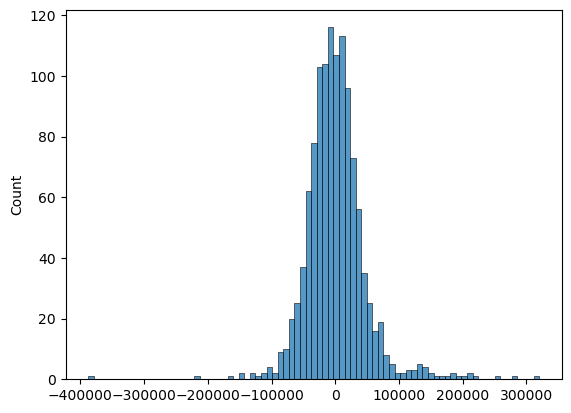

In [64]:
# errors should be normally distributed 
sns.histplot(FM.resid)


In [65]:
# Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
print(np.sqrt(mean_squared_error(testY,test_predict))) # 45272 # actual value,predicted values
print(mean_absolute_percentage_error(testY,test_predict))

45272.911811944956
0.1985646396072798


In [ ]:
# Linear Regression from SKlearn Library 

In [66]:
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression()

In [72]:
lr = model.fit(trainX,trainY)

In [73]:
predictions = lr.predict(testX)

In [76]:
from sklearn.metrics import accuracy_score

In [80]:
print(mean_absolute_percentage_error(testY,predictions))

0.19994587907485237
